In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [2]:
from keras.preprocessing import image
import numpy as np

img_path      = "./당구공.jpg"
img           = image.load_img(img_path, target_size=(224, 224))
img_tensor    = image.img_to_array(img)
# img_tensor_4d = np.expand_dims(img_tensor, axis=0)
# img_tensor_4d /= 255.

# print(img_tensor.shape)
# print(img_tensor_4d.shape)

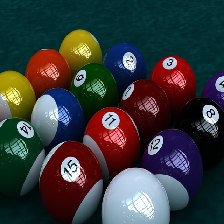

In [3]:
# plt.imshow(img_tensor_4d[0])
img

In [4]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(img_tensor)
image.shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


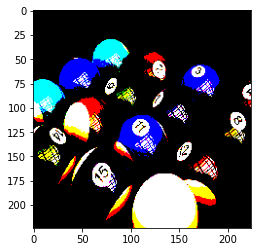

In [6]:
import matplotlib.pyplot as plt

plt.imshow(image)

In [8]:
import tensorflow as tf

model = tf.keras.applications.vgg19.VGG19(weights='imagenet')
yhat = model.predict(image[np.newaxis,:,:,:])

from keras.applications.vgg19 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

40960/35363 [==================================] - 0s 0us/step
golf_ball (42.71%)


In [9]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf
import numpy as np

image_size = 224

# Load pre-trained Keras model and the image to classify
# model = tf.keras.applications.vgg16.VGG16()
model = tf.keras.applications.vgg19.VGG19(weights='imagenet')

# image = np.random.random((image_size, image_size, 3))
# img_tensor = preprocessing.image.img_to_array(image)
# img_tensor = np.expand_dims(img_tensor, axis=0)
# img_tensor = preprocess_input(img_tensor)

# conv_layer = model.get_layer("block5_conv3")
conv_layer = model.get_layer("block5_conv3")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(image[np.newaxis,:,:,:])
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

(1, 14, 14)


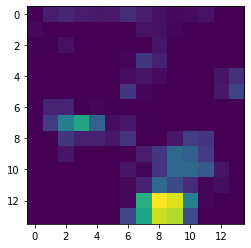

In [10]:
import matplotlib.pyplot as plt

plt.imshow(heatmap[0])

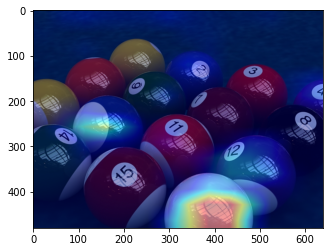

In [11]:
import cv2

img                = cv2.imread(img_path)

heatmap_resize     = cv2.resize(heatmap[0], (img.shape[1], img.shape[0]))
# heatmap을 원본 이미지 크기에 맞게 변경한다.

heatmap_rgb_format = np.uint8(255 * heatmap_resize)
# heatmap을 RGB 포맷으로 변환한다.

heatmap_conversion = cv2.applyColorMap(heatmap_rgb_format, cv2.COLORMAP_JET)
# 히트맵으로 변환한다.

# superimposed_img = heatmap_conversion * 0.4 + img
# 0.4는 히트맵의 강도이다.
superimposed_img = cv2.addWeighted(heatmap_conversion, 0.4, img, 0.6, 0)

plt.imshow(superimposed_img[:,:,::-1])

In [ ]:
model.decode_predictions(np.arange(1000), top=1000)

AttributeError: ignored